['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']


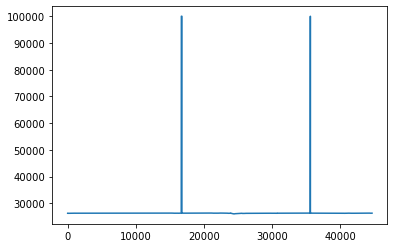

In [4]:
# importamos las librerías que vamos a necesitar
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np

# nuestra librería
#import ist_lib as ist


def read_im(filename):
    
    dd=dict();
   
    # leer el fichero por líneas
    f=open(filename)
    lines=f.readlines()
    
    # obtener el tamaño de la cabecera
    head_size=0
    while lines[head_size][0] != 'D':
        head_size+=1

    # obtener cúales son las componentes: 'HDZF', 'XYZF' u otras
    comp=lines[7].split()[1]
    
    # obtener la latitud y la longitud geográfica del observatorio
    lat=lines[4].split()[2]
    lon=lines[5].split()[2]
    
    names=['datetime','doy','c1','c2','c3','c4']
    colspecs=[(0,23), (25,27), (32,40), (42,50), (52,60), (62,70)]
    data=pd.read_fwf(filename,header=head_size,names=names, colspecs=colspecs)

    # Transform 99999 values to NaN
    data.c1 = np.where(data.c1 == 99999, data.c1*np.nan, data.c1)
    data.c2 = np.where(data.c2 == 99999, data.c2*np.nan, data.c2)
    data.c3 = np.where(data.c3 == 99999, data.c3*np.nan, data.c3)
    data.c4 = np.where(data.c4 == 99999, data.c4*np.nan, data.c4)


    dd['data']=data
    dd['lon']=lon
    dd['lat']=lat
    dd['comp']=comp
    
    return dd  


folder='dst_stations/2015-03/'
month='201503'

# observatorios usados para el índice Dst
obs=['her','hon','kak','sjg']

# días a observar: todo el mes '01' - '31'
qs=pd.Series(range(1,32))
qs=pd.Series.tolist(qs.apply(lambda x: '{0:0>2}'.format(x)))
print(qs)

# variable para guardar todos los datos (1440 minutos) de los cuatro observatorios,
# los días necesarios
dat = np.zeros([len(obs),len(qs),1440])

# leer todos los días en calma del mes para cada observatorio (sólo la componente H (c1))
for o in obs:
    for q in qs:
        filename=folder + o + '/' + o + month + q + 'qmin.min'
        df=read_im(filename=filename)
        datah=df['data']
        dat[obs.index(o)][qs.index(q)][:]=datah.c1
        
# Todos los días de SJG
sjg = dat[3][:][:].reshape(-1)
plt.plot(sjg);

(array([16657, 16658, 16659, 16660, 16661, 16662, 16663, 16664, 16665,
       16666, 16667, 16668, 16669, 16670, 16671, 16672, 16673, 16674,
       16675, 16676, 16677, 16678, 16679, 16680, 16681, 16682, 16683,
       16684, 16685, 16686, 16687, 16688, 16689, 16690, 16691, 16692,
       16693, 16694, 16695, 16696, 16697, 16698, 16699, 16700, 16701,
       16702, 16703, 16704, 16705, 16706, 16707, 16708, 16709, 16710,
       16711, 16712, 16713, 16714, 16715, 16716, 16717, 16718, 16719,
       16720, 16721, 16722, 16723, 16724, 16725, 16726, 16727, 16728,
       16729, 16730, 16731, 16732, 16733, 16734, 16735, 16736, 16737,
       16738, 16739, 16740, 16741, 16742, 16743, 16744, 16745, 16746,
       16747, 16748, 16749, 16750, 35586, 35587, 35588, 35589, 35590,
       35591, 35592, 35593, 35594], dtype=int64),)


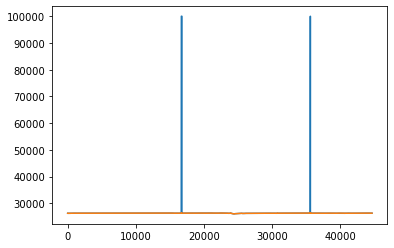

In [2]:
plt.plot(sjg);
print( np.where(sjg == 99999))
sjg=np.where(sjg == 99999,sjg*np.nan,sjg)
plt.plot(sjg);